In [1]:
from pathlib import Path
import itertools

import numpy as np
# https://matplotlib.org/gallery/lines_bars_and_markers/curve_error_band.html#sphx-glr-gallery-lines-bars-and-markers-curve-error-band-py
from scipy.interpolate import splprep, splev


import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.collections as mcollections
import matplotlib.colors as mcolors
import matplotlib.path as mpath
import matplotlib.pyplot as plt


import themepy
spath = Path("../../../draft/figures/math/")

theme = themepy.Theme('paper')

%matplotlib inline

In [4]:
#shift emojis left
idx1 = [0,1,2]
idx2= [2,0,1]
idx3 = [1,2, 0]
nu1 = {'confused':'😕', 'woozy':'🥴', 'shruggy':'🙃'}
keys = list(nu1.keys())
nu2 = {keys[i]:nu1[keys[i]] for i in idx2}
nu3 = {keys[i]:nu1[keys[i]] for i in idx3}

c1, c2, c3 = 'C2', 'C5', 'C11'
colork = {'confused':c1, 'woozy':c2, 'shruggy':c3}
colorv = {'😕':c1, '🥴':c2, '🙃':c3}


{'confused': '😕', 'woozy': '🥴', 'shruggy': '🙃'}
{'shruggy': '🙃', 'confused': '😕', 'woozy': '🥴'}
{'woozy': '🥴', 'shruggy': '🙃', 'confused': '😕'}


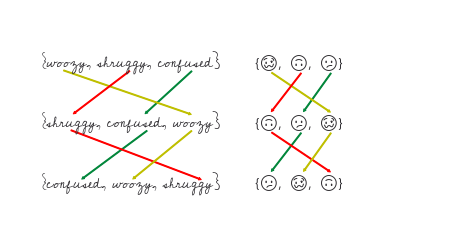

In [5]:
fig, ax = plt.subplots(figsize=(8,4))

for i, nu in enumerate([nu1, nu2, nu3]):
    print(nu)
    ax.text(.2, i/3, f"{{{', '.join(nu.keys())}}}", fontsize=14)
    ax.text(4.5, i/3, f"{{{',  '.join(nu.values())}}}", fontsize=14, fontfamily='Segoe UI Emoji')


#first shuffle
pt = .65
pb = .4
et = .64
eb = .41

p11 = mpatches.FancyArrowPatch((3.25, pt), (2.25, pb), mutation_scale=5, color=colork['confused'])
ax.add_patch(p11) #confused
p12 =  mpatches.FancyArrowPatch((0.6, pt), (3.25, pb), mutation_scale=5, color=colork['woozy'])
ax.add_patch(p12)#woozy
p13 =  mpatches.FancyArrowPatch((2.0, pt), (0.8, pb), mutation_scale=5, color=colork['shruggy'])
ax.add_patch(p13) #shruggy

e11 =  mpatches.FancyArrowPatch((7.75-1.7, et), (7.15-1.7, eb), mutation_scale=5, color=colork['confused'])
ax.add_patch(e11) #confused
e12 = mpatches.FancyArrowPatch((6.5-1.7, et), (7.75-1.7, eb), mutation_scale=5, color=colork['woozy'])
ax.add_patch(e12) #woozy
e13 =  mpatches.FancyArrowPatch((7.15-1.7, et), (6.5-1.7, eb), mutation_scale=5, color=colork['shruggy'])
ax.add_patch(e13) #shruggy


#second shuffle
pt2 = .32
pb2 = .04
et2 = .31
eb2 = .08


p21 = mpatches.FancyArrowPatch( (2.35, pt2), (0.97,pb2) , mutation_scale=5, color=colork['confused'])
ax.add_patch(p21) #confused
p22 =  mpatches.FancyArrowPatch((0.75, pt2), (3.45, pb2), mutation_scale=5, color=colork['shruggy'])
ax.add_patch(p22)#woozy
p23 =  mpatches.FancyArrowPatch((3.25, pt2), (2, pb2), mutation_scale=5, color=colork['woozy'])
ax.add_patch(p23) #shruggy

e21 = mpatches.FancyArrowPatch( (7.15-1.7, et2), (6.5-1.7, eb2) , mutation_scale=5, color=colork['confused'])
ax.add_patch(e21) #confused
e22 =  mpatches.FancyArrowPatch((6.5-1.7, et2), (7.75-1.7, eb2), mutation_scale=5, color=colork['shruggy'])
ax.add_patch(e22)#woozy
e23 =  mpatches.FancyArrowPatch((7.75-1.7, et2), (7.15-1.7, eb2), mutation_scale=5, color=colork['woozy'])
ax.add_patch(e23) #shruggy


ax.set(xlim=(-0.5,8.5), ylim=(-0.2,1))
ax.axis('off')
fig.savefig(spath/"equivariance_nu.png", bbox_inches='tight', facecolor='white' )

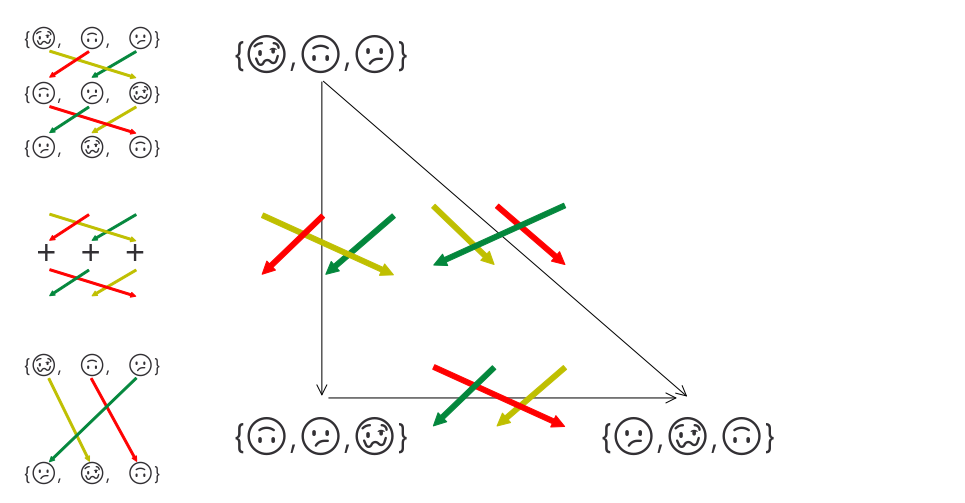

In [357]:
fig, axd = plt.subplot_mosaic([['shift', 'triangle'], ['add', 'triangle'], ['compose', 'triangle']], 
                                figsize=(18,9), 
                                gridspec_kw={'wspace':0, 'hspace':0, 'width_ratios':[1,3]})
ms = 10

ex = .1
def efmt(nu):
    return f"{{{',   '.join(nu.values())}}}"

text_kw = {'fontsize':20, 'fontfamily':'Segoe UI Emoji'}
for name in ['shift', 'add', 'compose']:
    axd[name].set(xlim=(0,1), ylim=(0,1), aspect='equal')

# two permutations
for i, nu in enumerate([nu1, nu2, nu3]):
    axd['shift'].text(ex, (1/3*i)+.1 ,efmt(nu), 
                      transform = axd['shift'].transData,**text_kw)

first, second, third = 0.25, 0.51, 0.8
def double_arrow(ax):
    top, bottom = .73, .56, 
    e11 =  mpatches.FancyArrowPatch((third, top), (second, bottom), transform=ax.transData,
                                    mutation_scale=ms, color=colork['confused'])
    ax.add_patch(e11) #confused
    e12 = mpatches.FancyArrowPatch((first, top), (third, bottom), transform=ax.transData,
                                   mutation_scale=ms, color=colork['woozy'])
    ax.add_patch(e12) #woozy
    e13 =  mpatches.FancyArrowPatch((second, top), (first, bottom), transform=ax.transData,
                                    mutation_scale=ms, color=colork['shruggy'])
    ax.add_patch(e13)

    top, bottom = .39, .22
    e11 =  mpatches.FancyArrowPatch((third, top), (second, bottom), transform=ax.transData,
                                    mutation_scale=ms, color=colork['woozy'])
    ax.add_patch(e11) #confused
    e12 = mpatches.FancyArrowPatch((first, top), (third, bottom),transform=ax.transData,
                                   mutation_scale=ms, color=colork['shruggy'])
    ax.add_patch(e12) #woozy
    e13 =  mpatches.FancyArrowPatch((second, top), (first, bottom), transform=ax.transData,
                                    mutation_scale=ms, color=colork['confused'])
    ax.add_patch(e13)

double_arrow(axd['shift'])
# composite permutation
middle = ['+', '+', '+']
for i, nu in enumerate([nu1, middle, nu3]):
    text = " +  +  +  " if i == 1 else ""
    text_kw['fontsize'] = 36 if i == 1 else 20
    axd['add'].text(ex, (1/3*i)+.1 ,text , **text_kw)
double_arrow(axd['add'])

def efmt(nu):
    return f"{{{',   '.join(nu.values())}}}"

for i, nu in enumerate([nu1, nu2, nu3]):
    if i==1: continue
    axd['compose'].text(ex, (1/3*i)+.1 , efmt(nu), transform = axd['compose'].transData,**text_kw)
                    
top, bottom = .73, .2
e11 =  mpatches.FancyArrowPatch((first, top), (second, bottom), transform=axd['compose'].transData,
                                mutation_scale=ms, color=colork['woozy'])
axd['compose'].add_patch(e11) #confused
e12 = mpatches.FancyArrowPatch((second, top), (third, bottom),transform=axd['compose'].transData,
                               mutation_scale=ms, color=colork['shruggy'])
axd['compose'].add_patch(e12) #woozy
e13 =  mpatches.FancyArrowPatch((third, top), (first, bottom), transform=axd['compose'].transData,
                                mutation_scale=ms, color=colork['confused'])
axd['compose'].add_patch(e13)


c1 = .2
c2y = .85
c2x = .95
acolor = 'black'
lw=.5
ms=25
av = mpatches.FancyArrowPatch((c1, c2y), (c1, c1), arrowstyle='->', mutation_scale=ms,color=acolor)
axd['triangle'].add_patch(av)
ah = mpatches.FancyArrowPatch((c1+.01, c1), (c2x-.02, c1),arrowstyle='->', mutation_scale=ms, color=acolor)
axd['triangle'].add_patch(ah)
ad = mpatches.FancyArrowPatch((c1, c2y), (c2x, c1),arrowstyle='->', mutation_scale=ms, color=acolor)
axd['triangle'].add_patch(ad)


yshift = .1
xshift = .18
text_kw['fontsize']=34

def efmt2(nu):
    return f"{{{','.join(nu.values())}}}"

axd['triangle'].text(c1-xshift, c2y+.03 , efmt2(nu3), **text_kw, transform=axd['triangle'].transData) #ul
axd['triangle'].text(c1-xshift, c1-yshift, efmt2(nu2), **text_kw, transform=axd['triangle'].transData) #ll
axd['triangle'].text(c2x-xshift, c1-yshift, efmt2(nu1), **text_kw, transform=axd['triangle'].transData) #lr
axd['triangle'].set(aspect='equal', xlim=(0, 1.5))

ms = 25
originx = np.array([0.25, 0.51, 0.8])*.5
originy = np.array([.75, .5])*.5

# first translation

first, second, third = originx -.05
top, bottom = originy + .2
e11 =  mpatches.FancyArrowPatch((third, top), (second, bottom), transform=axd['triangle'].transData,
                                mutation_scale=ms, color=colork['confused'])
axd['triangle'].add_patch(e11) #confused
e12 = mpatches.FancyArrowPatch((first, top), (third, bottom), transform=axd['triangle'].transData,
                               mutation_scale=ms, color=colork['woozy'])
axd['triangle'].add_patch(e12) #woozy
e13 =  mpatches.FancyArrowPatch((second, top), (first, bottom), transform=axd['triangle'].transData,
                                mutation_scale=ms, color=colork['shruggy'])
axd['triangle'].add_patch(e13)

#second translation
first, second, third = originx +.3
top, bottom = originy - .11
e11 =  mpatches.FancyArrowPatch((third, top), (second, bottom), transform=axd['triangle'].transData,
                                mutation_scale=ms, color=colork['woozy'])
axd['triangle'].add_patch(e11) #confused
e12 = mpatches.FancyArrowPatch((first, top), (third, bottom),transform=axd['triangle'].transData,
                               mutation_scale=ms, color=colork['shruggy'])
axd['triangle'].add_patch(e12) #woozy
e13 =  mpatches.FancyArrowPatch((second, top), (first, bottom), transform=axd['triangle'].transData,
                                mutation_scale=ms, color=colork['confused'])
axd['triangle'].add_patch(e13)
# third translation
first, second, third = originx +.3
top, bottom = originy + .22
e11 =  mpatches.FancyArrowPatch((first, top), (second, bottom), transform=axd['triangle'].transData,
                                mutation_scale=ms, color=colork['woozy'])
axd['triangle'].add_patch(e11) #confused
e12 = mpatches.FancyArrowPatch((second, top), (third, bottom),transform=axd['triangle'].transData,
                               mutation_scale=ms, color=colork['shruggy'])
axd['triangle'].add_patch(e12) #woozy
e13 =  mpatches.FancyArrowPatch((third, top), (first, bottom), transform=axd['triangle'].transData,
                                mutation_scale=ms, color=colork['confused'])
axd['triangle'].add_patch(e13)

for name in axd:
    axd[name].axis('off')
fig.savefig(spath/"monoid_emoji.png", bbox_inches='tight', facecolor='white' )

In [320]:
nu1

{'confused': '😕', 'woozy': '🥴', 'shruggy': '🙃'}